Exercises and code samples for the course Unsupervised and Reinforcement Learning (AAI-URL) in the Bachelor of AAI at Rosenheim University of Applied Sciences.


# Principal Component Analysis - Example

The purpose of this notebook is to show how principal component analysis works for data sets with a large number of variables describing a phenomenon. Principal component analysis is an algorithm used to reduce the number of variables (dimensions) in order to reduce the complexity of the dataset, to simplify the batch data that we want to use in further modeling, and to be able to visualize in 2D or 3D the relevant results from the modeling.

Principal component analysis reduces larger dimensions to smaller dimensions in an attempt to retain as much information as possible about the reduced variables. This information is preserved in the variance that the principal components explain. Moderation in the number of principal components should be exercised by keeping in mind the highest possible variance of all explanatory variables in the data set.


## Dataset

A measure of the effect of air pollution on the marginal willingness to pay higher housing costs in the city of Boston was analyzed in a paper Harrison Jr and Rubinfeld (1978). The entire article raises very important economic issues for citizens. The authors first dealt with an attempt to determine the hedonic equation of housing value as a function of the degree of pollution, then tried to determine the marginal willingness to pay for cleaner air, and to determine the equation of the housing demand curve as a function of many important parameters such as distance from the nearest 5 jobs, highway availability, tax rates, etc. They found unequivocally that it is very difficult to estimate correctly the marginal willingness to pay for cleaner air because people incorrectly underestimate the benefits of such conditions by up to 60%. Neither changing the functional form of marginal willingness to pay nor changing the variables to other variables had a statistically significant effect on the correct valuation of housing and social benefits.

The dataset, which is accessible through a web service [Kaggle Boston Real Estate](https://www.kaggle.com/datasets/altavish/boston-housing-dataset) describes the characteristics of selected apartments in various locations in Boston. It includes a wealth of information on crime per capita, access to the nearest jobs, freeway accessibility, number of rooms in the apartment, or air pollution. The literature presented, in which the authors tried to explain the variation of housing price depending on many variables using econometric methods (linear regression model) shows the significance of these variables.

In [3]:
import pandas as pd
import numpy as np

# Importing Housing.csv
housing = pd.read_csv('./data/HousingData.xls')

# Looking at the first five rows
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Data description

         CrimesPerCapita = CRIM,
         PropotionOfLandZonedForLots = ZN,
         PropotionOfNonRetailBusiness = INDUS,
         NitricOxidesConcentration = NOX,
         AverageNumberOfRooms = RM,
         ProportionOfOccupiedUnits = AGE,
         WeightedDistancesToFiveEmploy = DIS,
         IndexOfAccessibilityHighway = RAD,
         ValueOfTaxRate = TAX,
         PupilTeacherRatio = PTRATIO,
         PropotionOfBlackPeople = B,
         ProportionOfPopLowerStatus = LSTAT,
         MedianValueHome = MEDV

## Correlation matrix

Before proceeding to principal component analysis, it would be necessary to initially determine the matrix of correlation coefficients between the analyzed variables. All variables can be considered as continuous variables or as ratio or interval variables. For this purpose we determine Pearson correlation coefficients.

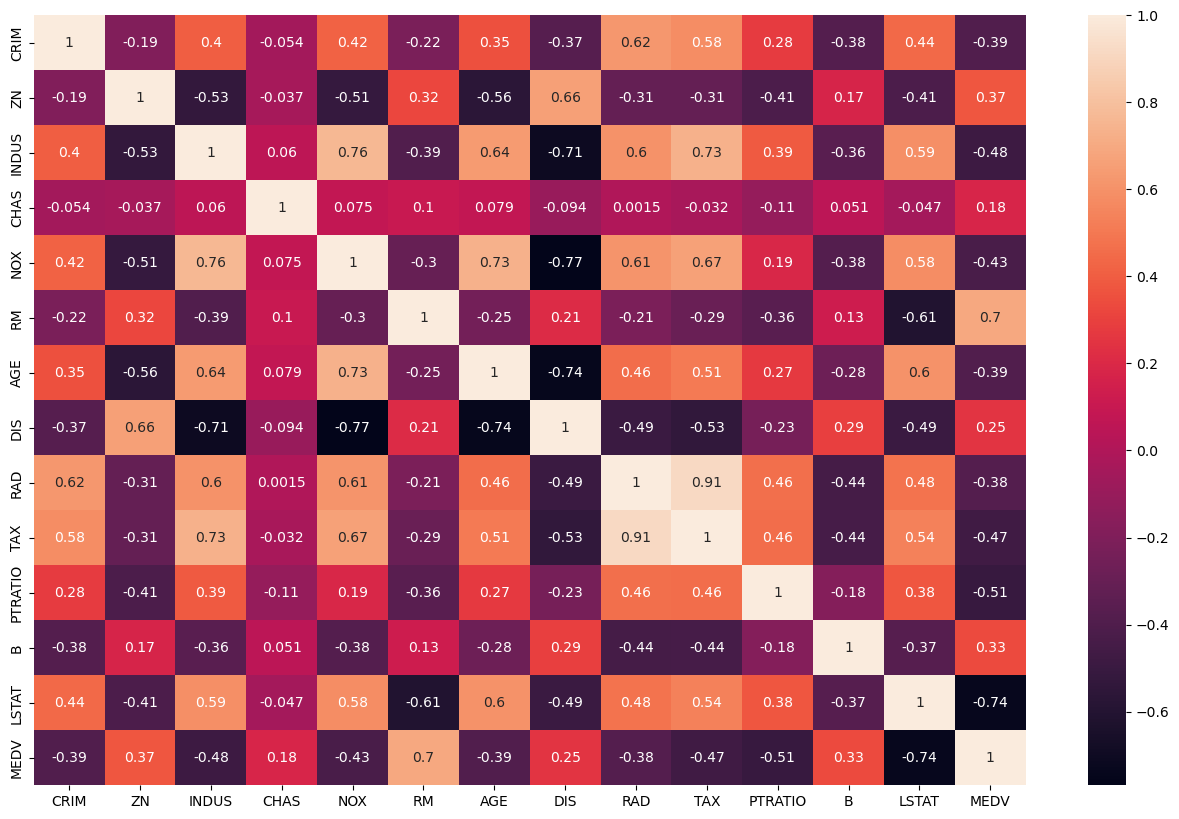

In [5]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True)
plt.show()

At first glance, we can see that most of the variables are neither negatively nor positively correlated with each other. On the other hand, there is also a moderate pair of variables that are positively or negatively correlated. 

- To the positive correlations we may consider the **median price of apartments** (MEDV) with the **average number of rooms** (RM). This makes economic sense, since the more rooms, the larger the apartment, the more expensive it will cost. 
- Also, the amount of **housing tax** (TAX) is positively correlated with the **highway accessibility index** (RAD).
- Among the negative correlations we can include the **amount of housing prices** (MEDV) with the **proportion of wealthy people** (LSTAT). The higher the prices, the less people will be able to afford the housing.

Let's perform some normalization

In [6]:
from sklearn.preprocessing import StandardScaler

#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=housing.dropna().copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [7]:
scaled_df.head

<bound method NDFrame.head of          CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.400818  0.273342 -1.259620 -0.271237 -0.134687  0.423161 -0.134014   
1   -0.398535 -0.479051 -0.569724 -0.271237 -0.745475  0.202245  0.357849   
2   -0.398537 -0.479051 -0.569724 -0.271237 -0.745475  1.298216 -0.281214   
3   -0.397984 -0.479051 -1.278462 -0.271237 -0.842847  1.029962 -0.830521   
4   -0.398258 -0.479051 -1.278462 -0.271237 -0.842847  0.215156 -0.367380   
..        ...       ...       ...       ...       ...       ...       ...   
389 -0.382157 -0.479051 -0.189991 -0.271237  0.281356 -1.019964  0.163976   
390 -0.377092 -0.479051 -0.189991 -0.271237  0.281356 -0.362955  0.386570   
391 -0.396580 -0.479051  0.134666 -0.271237  0.175132 -0.229545  0.278863   
392 -0.394895 -0.479051  0.134666 -0.271237  0.175132  0.998402  0.792268   
393 -0.389582 -0.479051  0.134666 -0.271237  0.175132  0.737320  0.731233   

          DIS       RAD       TAX   PTRATIO  

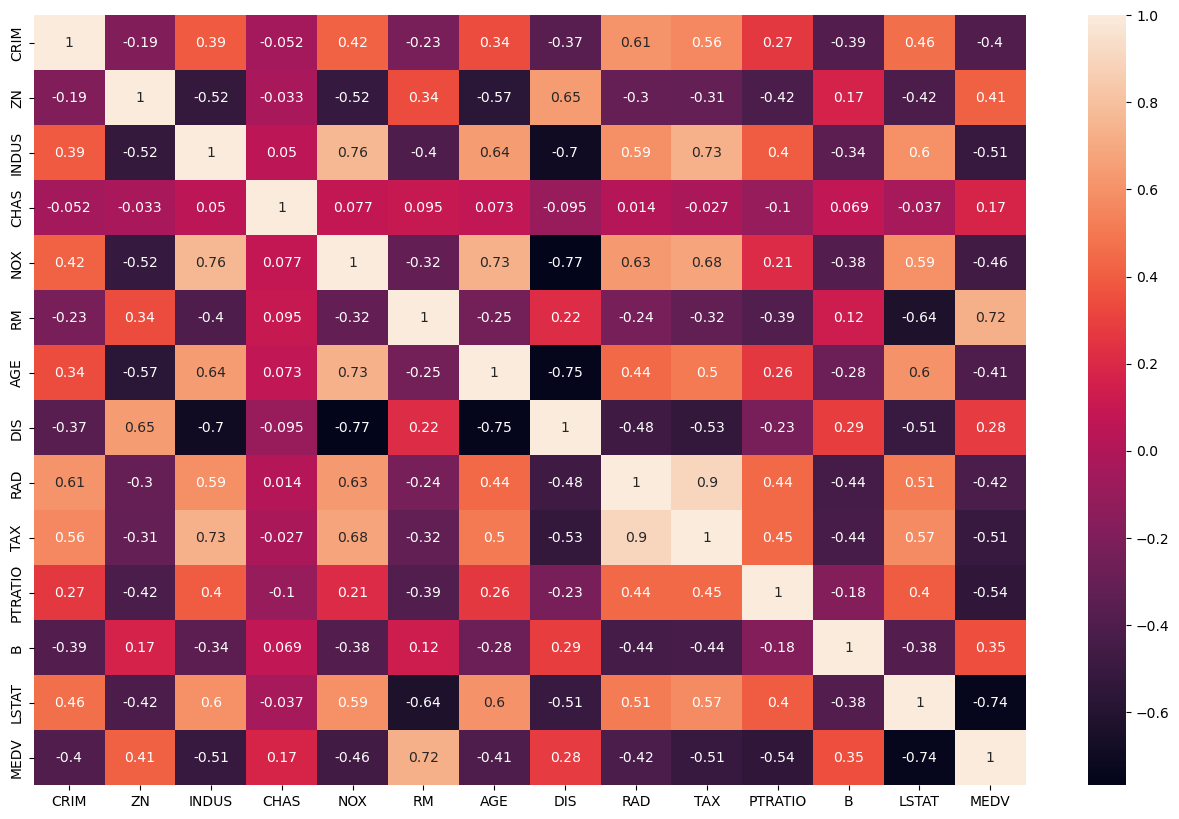

In [8]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(scaled_df.corr(),annot = True)
plt.show()

## Principal component analysis

Principal component analysis is the most important part of this study. Principal component analysis as mentioned earlier is responsible for reducing the number of dimensions while keeping as much of the variance of all variables as possible. The higher percentage of variance is explained by principal components the less information is lost with this transformation.

In order to obtain unencumbered eigenvalues and eigenvectors, one should first standardize all the variables under consideration. This gives us values from a normal distribution with mean 0 and variance equal to 1.

In [9]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=14)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

Let’s now turn to the visualization of the ScreePlot plot, which shows us how successive principal components play a role in explaining the variance of all the variables. In the chart below, we see that the first principal component explains almost 50% of the variance of the variables in the dataset. The second and third principal components explain 11% and 10%, respectively. If we were interested in 3D visualization we would have to choose the first three principal components, which together explain almost 71% of the variance. This is a very good and satisfying result. It is also an unwritten rule that the standard deviation of the principal component should exceed 1.

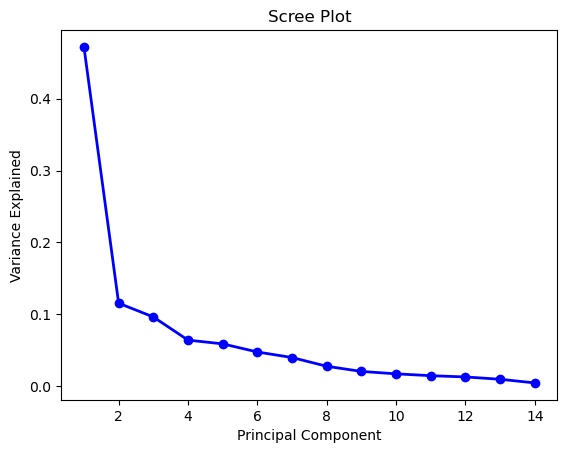

In [10]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

We can also use the following code to display the exact percentage of total variance explained by each principal component:

In [16]:
np_pca = pca.explained_variance_ratio_
print(f"Variance by PCA {np_pca}")
print(f"Cummulative sum {np.cumsum(np_pca)}")


Variance by PCA [0.4721123  0.11538325 0.09625257 0.06400816 0.05879318 0.04748699
 0.03975753 0.0275923  0.02041726 0.01706197 0.01449161 0.0127224
 0.00950503 0.00441544]
Cummulative sum [0.4721123  0.58749555 0.68374813 0.74775629 0.80654946 0.85403645
 0.89379398 0.92138627 0.94180354 0.95886551 0.97335712 0.98607952
 0.99558456 1.        ]


We can see:

- The first principal component explains 47.21% of the total variation in the dataset.
- The second principal component explains 11.53% of the total variation.
- The third principal component explains 9.63% of the total variation.
- The fourth principal component explains 6.40% of the total variation.


In [42]:
v2 = np.sum(np_pca[:3])
print(v2)
v8 = np.sum(np_pca[:9])
print(v8)

0.6837481260260989
0.9418035398356176


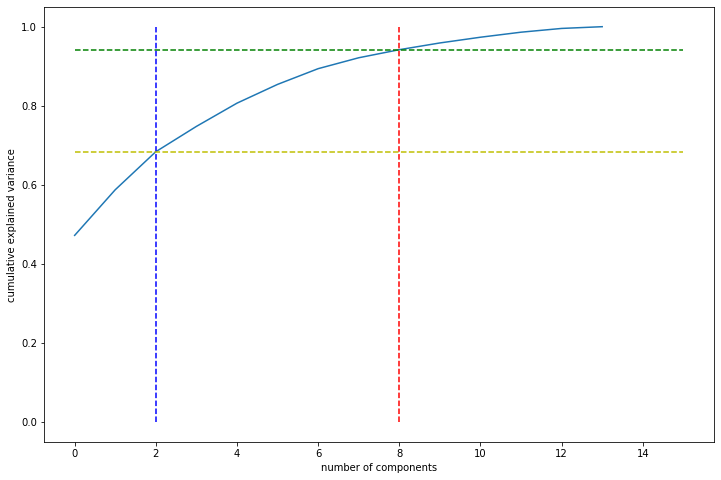

In [43]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.vlines(x=2, ymax=1, ymin=0, colors="b", linestyles="--")
plt.hlines(y=v2, xmax=15, xmin=0, colors="y", linestyles="--")

plt.vlines(x=8, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=v8, xmax=15, xmin=0, colors="g", linestyles="--")

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Interpretation

The following visualization concretely shows through vectors which variable plays a key role for a given observation. Additionally, the longer the length of the vector, the more the variable plays a role in creating the principal component. Vectors that are perpendicular to each other are considered independent. As we have concluded from the correlation matrix analysis, the variables average number of rooms and median price of apartments are identically correlated. However, vector perpendicular to these two is, for example, weighted average of distance to the 5 nearest workplaces.

In [35]:


components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':housing.columns })
components



,PC1,PC2,Feature
0,0.234831,-0.045194,CRIM
1,-0.243714,-0.106775,ZN
2,0.328397,0.128956,INDUS
3,-0.006067,0.401207,CHAS
4,0.325162,0.261418,NOX
5,-0.212800,0.448473,RM
6,0.294334,0.267138,AGE
7,-0.293133,-0.364693,DIS
8,0.299959,0.048925,RAD
9,0.323007,0.024486,TAX


In [44]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

-0.0

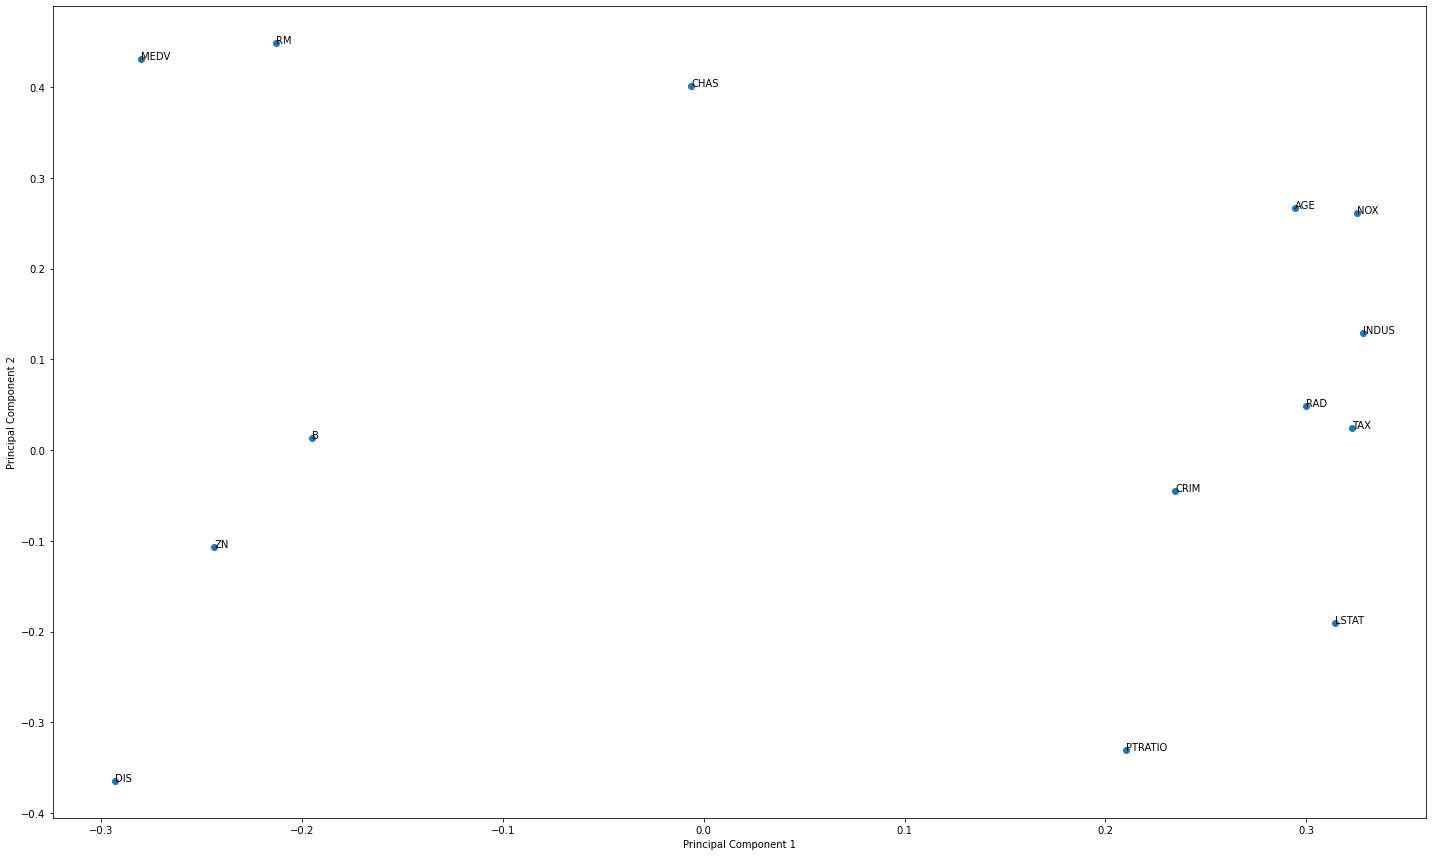

In [45]:


%matplotlib inline
fig = plt.figure(figsize = (20,12))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()



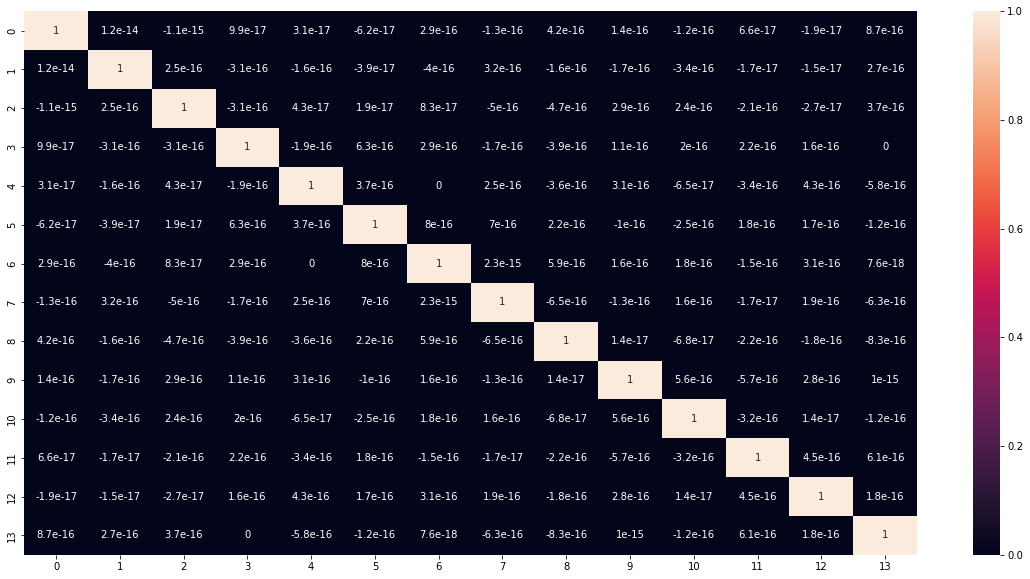

In [47]:
pca_train = pca.transform(scaled_df)
pca_train.shape


#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())
corrmat

plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()


At the same time, we can look at the vectors of variables that build the principal components, but also at the observations that have been transformed with the principal components. So with a bird’s eye view, we can look at which observations (using numbering) are more influenced by specific variables. More expensive housing with more rooms will be located in the upper left corner of the graph, while observations with higher crime index or pollution volume will be analogously located on the opposite side.

<AxesSubplot:>

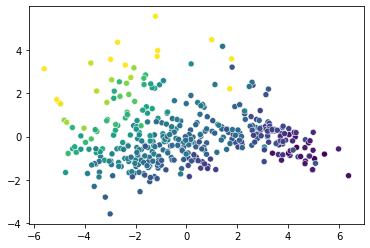

In [57]:
sns.scatterplot(x=pca_train[:,0], y=pca_train[:,1], c=scaled_df['MEDV'])
#sns.scatterplot(x=pca_train[:,0], y=pca_train[:,1], c=scaled_df['CRIM'])

## Summary

Principal component analysis by itself does not add much to modeling or creating relationships. However, there is a huge potential in this algorithm because not only does it simplify reality and the number of dimensions, but machine learning models are more likely to accept simplified data sets than very complex and extensive ones.